<a href="https://colab.research.google.com/github/sharulms/d30-entry-/blob/main/Formative_Assessment_(_Data_Preprocessing_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import files
uploaded = files.upload()



Saving Employee.csv to Employee.csv


In [3]:
import pandas as pd
data=pd.read_csv('Employee.csv')
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


Data Exploration:
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

In [5]:
import pandas as pd

# Load the dataset, replace 'your_file.csv' with the actual file name
df = pd.read_csv('Employee.csv')


for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)  # or df[column].nunique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {unique_count}\n")



Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [10]:
# Summary statistics for numerical columns (e.g., Salary, Years at the Company)
print("Numerical Data Summary:")
print(df.describe())

# Summary statistics for categorical columns (e.g., Department, Position)
print("\nCategorical Data Summary:")
print(df.describe(include='object'))

# Additional statistics like skewness for `Salary` or `YearsExperience`
print("\nSkewness of Numerical Features:")
print(df.skew())

print("\nKurtosis of Numerical Features:")
print(df.kurtosis())



Numerical Data Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000

Categorical Data Summary:
       Company   Place Country
count      140     134     148
unique       6      11       1
top        TCS  Mumbai   India
freq        53      37     148

Skewness of Numerical Features:


TypeError: could not convert string to float: 'TCS'

In [11]:
df.rename(columns={
    'EmpID': 'EmployeeID',
    'Dept': 'Department',
    'Pos': 'Position',
    'Sal': 'Salary'
}, inplace=True)

# Confirm the changes
print("\nUpdated Column Names:", df.columns)



Updated Column Names: Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


Data Cleaning: (Score : 2)
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [12]:
import numpy as np

# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Replace 0 in Age with NaN (assuming 'Age' is the column name for age data)
df['Age'].replace(0, np.nan, inplace=True)


Missing Values in Each Column:
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


<ipython-input-12-f4677694871e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, np.nan, inplace=True)


In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check if duplicates were removed
print("\nNumber of Duplicate Rows Remaining:", df.duplicated().sum())



Number of Duplicate Rows Remaining: 0


In [14]:
# Using the IQR method to detect outliers in the 'Salary' column as an example
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Defining a filter for outliers
outlier_filter = (df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))

# Display outliers in 'Salary' column
outliers = df[outlier_filter]
print("\nOutliers in Salary Column:")
print(outliers)

# Optionally, remove outliers
df = df[~outlier_filter]



Outliers in Salary Column:
Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


In [22]:

import pandas as pd
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Salary' with mean
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Fill missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm no missing values remain
print("\nMissing Values After Treatment:")
print(df.isnull().sum())







Missing Values After Treatment:
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


<ipython-input-22-ca394fbe1c3c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-22-ca394fbe1c3c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
import pandas as pd
data=pd.read_csv('Employee.csv')
data.head()




df['Age'].replace(0, np.nan, inplace=True)
print("Missing Values in Each Column Before Treatment:")
print(df.isnull().sum())


df.drop_duplicates(inplace=True)


Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
outlier_filter = (df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))
df = df[~outlier_filter]


df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

print("\nMissing Values After Treatment:")
print(df.isnull().sum())


Data Analysis: (Score : 2)
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

In [30]:
# Filter the data
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

# Display the filtered data
print("Filtered Data:")
print(filtered_data)


Filtered Data:
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


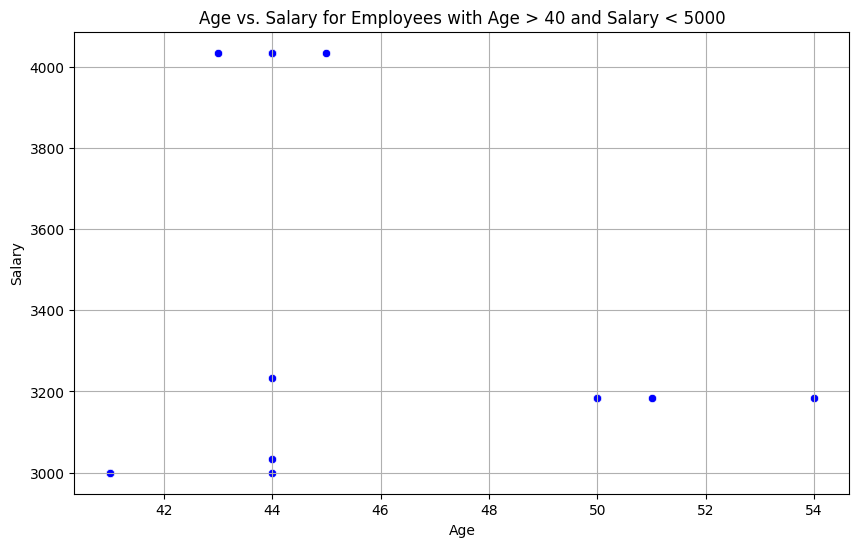

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Salary', color='blue')
plt.title('Age vs. Salary for Employees with Age > 40 and Salary < 5000')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()


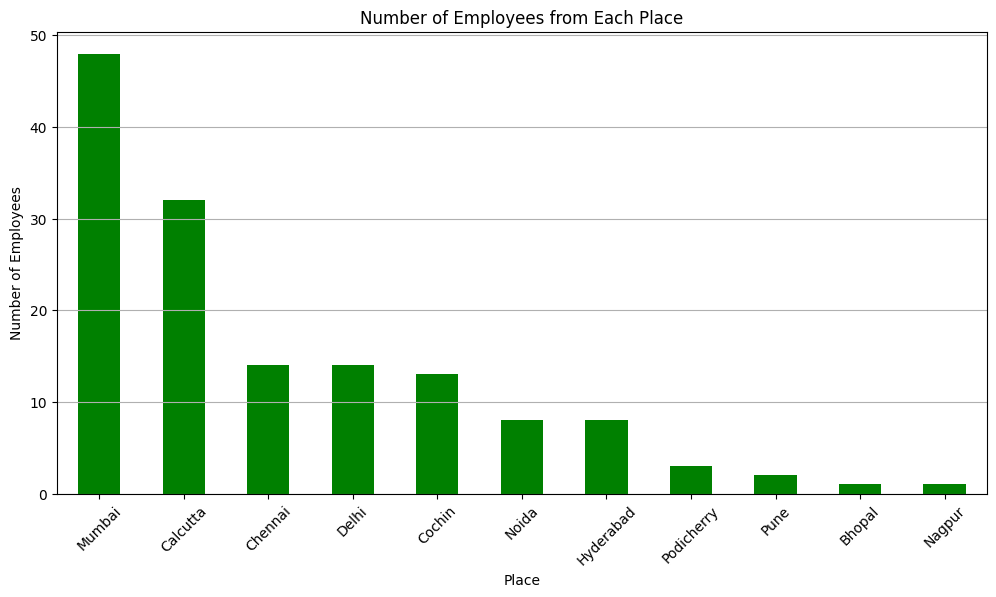

In [32]:
# Count the number of people from each place
place_counts = df['Place'].value_counts()

# Plotting the count of employees from each place
plt.figure(figsize=(12, 6))
place_counts.plot(kind='bar', color='green')
plt.title('Number of Employees from Each Place')
plt.xlabel('Place')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Filtered Data:
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


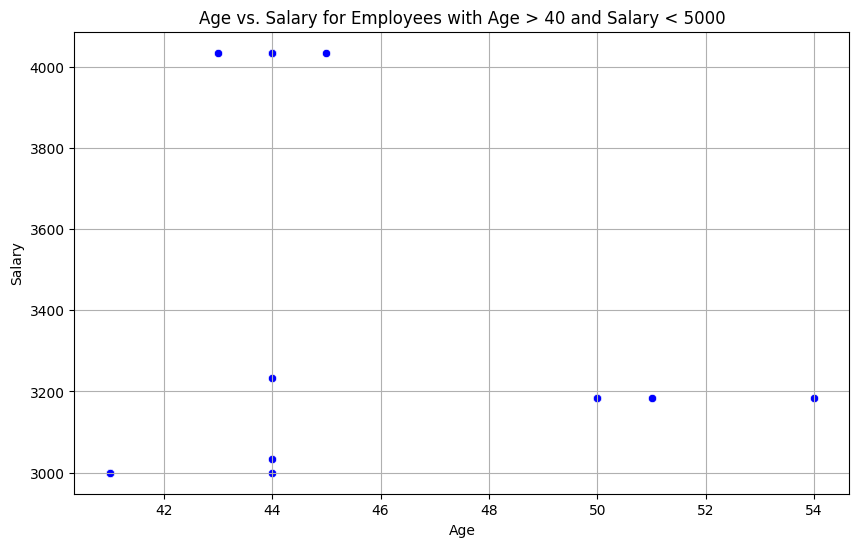

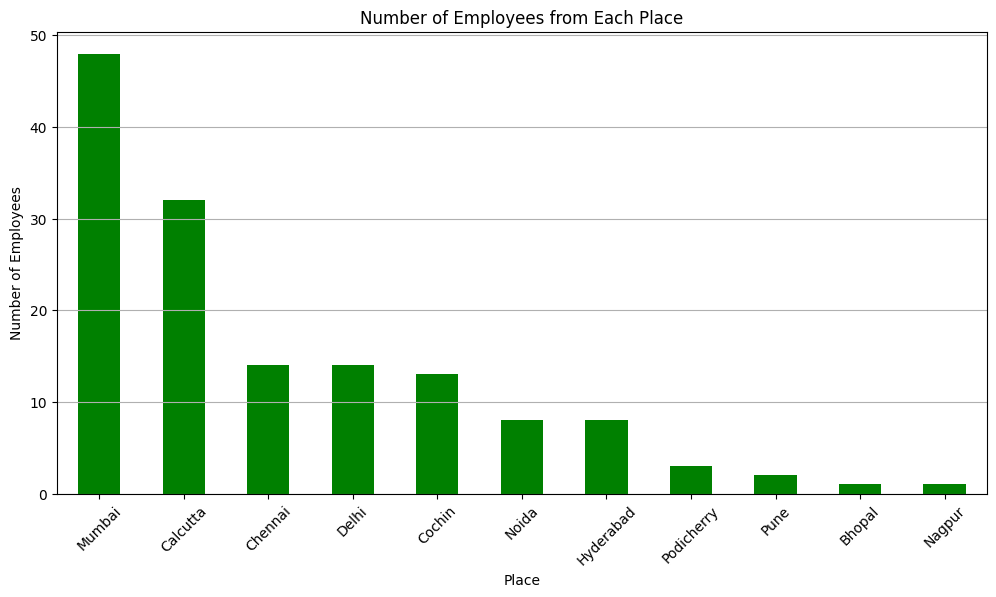

In [37]:



# Step 1: Filter the data
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print("Filtered Data:")
print(filtered_data)

# Step 2: Plot Age vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Salary', color='blue')
plt.title('Age vs. Salary for Employees with Age > 40 and Salary < 5000')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()

# Step 3: Count the number of people from each place
place_counts = df['Place'].value_counts()

# Plotting the count of employees from each place
plt.figure(figsize=(12, 6))
place_counts.plot(kind='bar', color='green')
plt.title('Number of Employees from Each Place')
plt.xlabel('Place')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Display the first few rows of the DataFrame to understand its structure
print("Initial DataFrame:")
print(df.head())

# Step 2: Identify categorical variables
# Let's assume 'Department' is nominal and 'Education' is ordinal
# Adjust these column names based on your actual dataset
nominal_columns = ['Department']  # Nominal variables (One-Hot Encoding)
ordinal_columns = ['Education']     # Ordinal variables (Label Encoding)




Initial DataFrame:
   Company   Age       Salary     Place Country  Gender
0      TCS  20.0  5283.471074   Chennai   India       0
1  Infosys  30.0  5283.471074    Mumbai   India       0
2      TCS  35.0  2300.000000  Calcutta   India       0
3  Infosys  40.0  3000.000000     Delhi   India       0
4      TCS  23.0  4000.000000    Mumbai   India       0


Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv('employee_data.csv')

# Display the first few rows of the DataFrame and its columns
print("DataFrame Head:")
print(df.head())
print("\nDataFrame Columns:")
print(df.columns)

# Check if 'Salary' is in the DataFrame
if 'Salary' in df.columns:
    # Identify categorical variables
    nominal_columns = ['Department']
    ordinal_columns = ['Education']

    # Apply One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

    # Apply Label Encoding
    label_encoder = LabelEncoder()
    for column in ordinal_columns:
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

    # Separate features and target variable
    X = df_encoded.drop(columns=['Salary'])  # Features
    y = df_encoded['Salary']                  # Target variable

    print("\nFeatures (X):")
    print(X.head())
    print("\nTarget (y):")
    print(y.head())
else:
    print("Target variable 'Salary' not found in the DataFrame.")
X.columns)

# Display the first few rows of the scaled DataFrames
print("Standard Scaled Features:")
print(X_standard_scaled_df.head())

print("\nMin-Max Scaled Features:")
print(X_minmax_scaled_df.head())
